import Packages

In [31]:
from Kalman_Filter import KalmanFilter
from track import tracking_object, Track

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

Generate Datas

For example, there will be 4 frames, each frame contains 3 cars, the filter will label and track each of them.

We have the position of cars.

In [32]:
car_1 = np.array([20.0, 30.0, 1.5])
car_2 = np.array([30.0, 40.0, 1.3])
car_3 = np.array([24.5, 12.5, 1.0])
frame_1 = [car_1, car_2, car_3]

car_1 = np.array([25.0, 30.0, 1.5])
car_2 = np.array([33.0, 41.0, 1.3])
car_3 = np.array([24.4, 11.5, 1.0])
frame_2 = [car_1, car_2, car_3]

car_1 = np.array([30.0, 31.0, 1.5])
car_2 = np.array([30.0, 41.0, 1.3])
car_3 = np.array([21.4, 11.5, 1.0])
frame_3 = [car_1, car_2, car_3]

car_1 = np.array([35.0, 32.0, 1.5])
car_2 = np.array([29.5, 41.0, 1.3])
car_3 = np.array([20.4, 11.5, 1.0])
frame_4 = [car_1, car_2, car_3]

frames = [frame_1, frame_2, frame_3, frame_4]


Plot example in each frame

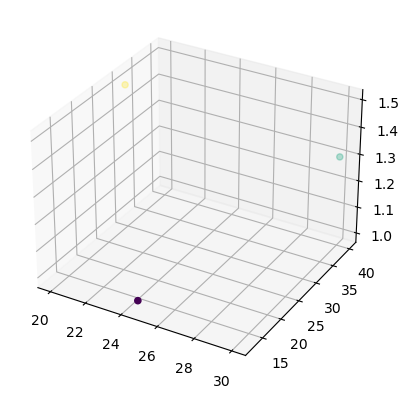

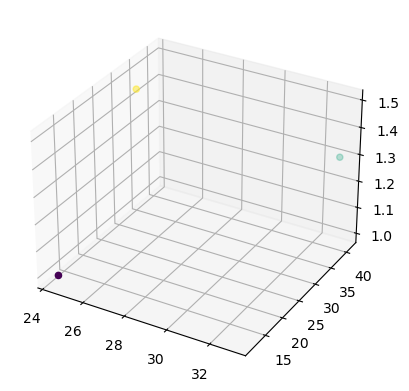

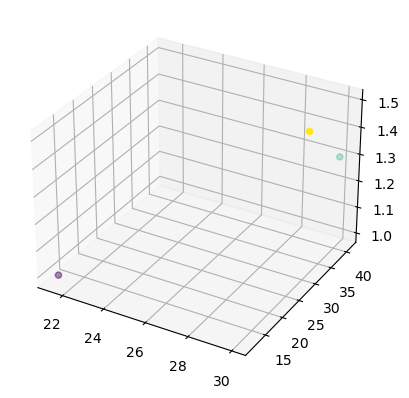

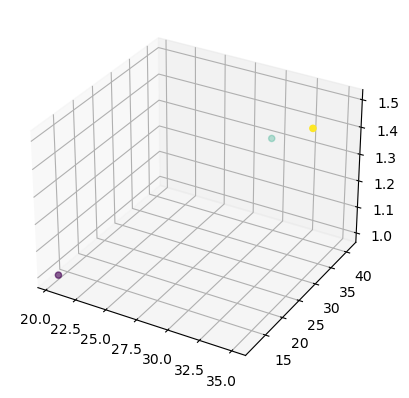

In [33]:
for frame in frames:
    x = [frame[i][0] for i in range(len(frame))]
    y = [frame[i][1] for i in range(len(frame))]
    z = [frame[i][2] for i in range(len(frame))]

    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.scatter3D(x, y, z, c=z, cmap = 'viridis')

    plt.show()

Track

In [34]:
tracking_objects = []
for i in range(len(frames)):
    frame = frames[i]
    print(f"frame{i + 1}")

    Track(frame, tracking_objects)
            


frame1
car1 [20.  30.   1.5  0.   0.   0. ]
car2 [30.  40.   1.3  0.   0.   0. ]
car3 [24.5 12.5  1.   0.   0.   0. ]
frame2
car1 [24.5 30.   1.5  2.   0.   0. ]
car2 [32.7 40.9  1.3  1.2  0.4  0. ]
car3 [24.41 11.6   1.   -0.04 -0.4   0.  ]
frame3
car1 [29.16921582 30.83713355  1.5         3.34392429  0.46254072  0.        ]
car2 [30.75396064 41.05115791  1.3        -0.47691143  0.26371407  0.        ]
car3 [21.87999439 11.45850365  1.         -1.41776648 -0.25320469  0.        ]
frame4
car1 [34.25876633 31.84975097  1.5         3.92833982  0.6873818   0.        ]
car2 [29.64485234 41.06504176  1.3        -0.73508965  0.16153585  0.        ]
car3 [20.40985438 11.4436973   1.         -1.44066992 -0.14967515  0.        ]


Show Tracking results

In [35]:
def plot_cube(x, y, z, length, ax, fig):
    
    # 计算正方体各个顶点的坐标
    vertices = np.array([
        [x - length/2, y - length/2, z - length/2],
        [x + length/2, y - length/2, z - length/2],
        [x + length/2, y + length/2, z - length/2],
        [x - length/2, y + length/2, z - length/2],
        [x - length/2, y - length/2, z + length/2],
        [x + length/2, y - length/2, z + length/2],
        [x + length/2, y + length/2, z + length/2],
        [x - length/2, y + length/2, z + length/2]
    ])

    # 定义正方体的面
    faces = np.array([
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # 正面
        [vertices[0], vertices[4], vertices[5], vertices[1]],  # 顶面
        [vertices[0], vertices[3], vertices[7], vertices[4]],  # 右侧面
        [vertices[6], vertices[7], vertices[3], vertices[2]],  # 底面
        [vertices[6], vertices[2], vertices[1], vertices[5]],  # 背面
        [vertices[6], vertices[5], vertices[4], vertices[7]]   # 左侧面
    ])


    # 创建多边形集合对象，并添加到坐标轴
    cube = Poly3DCollection(faces, alpha=0.6, linewidths=1, edgecolors='k')
    cube.set_facecolor('blue')
    ax.add_collection3d(cube)


    
    


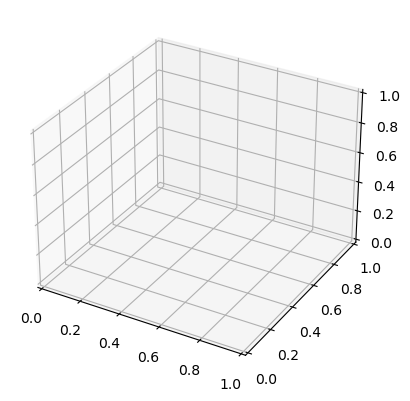

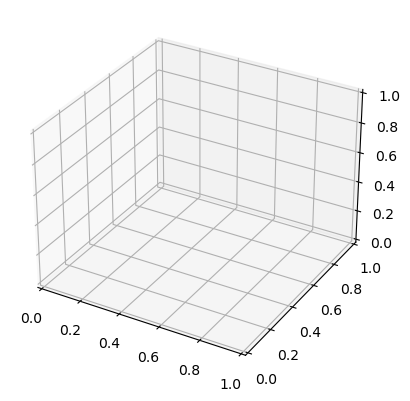

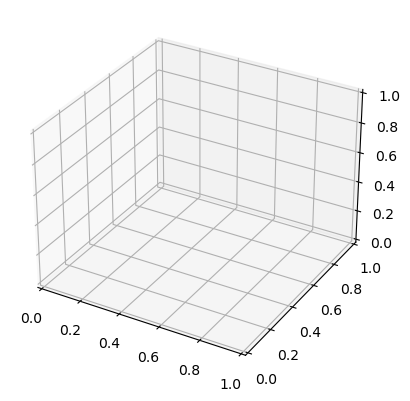

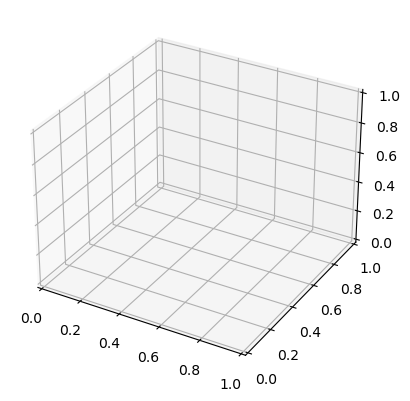

In [36]:
tracking_objects = set()
for frame in frames:
    x = [frame[i][0] for i in range(len(frame))]
    y = [frame[i][1] for i in range(len(frame))]
    z = [frame[i][2] for i in range(len(frame))]

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    # ax = fig.add_subplot(111, projection='3d')
    # # 设置坐标轴范围
    # ax.set_xlim([x - length, x + length])
    # ax.set_ylim([y - length, y + length])
    # ax.set_zlim([z - length, z + length])

    # # 设置坐标轴标签
    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')
    # ax.set_zlabel('Z')
    Track(frame, tracking_objects, log=False)
    
    for obj in tracking_objects:
        pos = obj.mean_tracking
        x_center = pos[0]
        y_center = pos[1]
        z_center = pos[2]

        plot_cube(x_center, y_center, z_center, 2, ax, fig)
    plt.show()